In [1]:
from pyedhrec import EDHRec
class MyEDHREc(EDHRec):
    def __init__(self):
        super().__init__()
        self._json_page_cards_url = "https://json.edhrec.com/pages/cards/"

    def get_similar_cards(self, cards_name: str):
        formatted_card_name = self.format_card_name(cards_name)
        url = f"{self._json_page_cards_url}{formatted_card_name}.json"
        data = self._get(url)
        return data["similar"]
myedhred = MyEDHREc()
similar_cards = myedhred.get_similar_cards("Pongify")
[x["name"] for x in similar_cards]

['Rapid Hybridization',
 'Beast Within',
 'Reality Shift',
 'Turn to Frog',
 'Chaos Warp',
 'Swan Song']

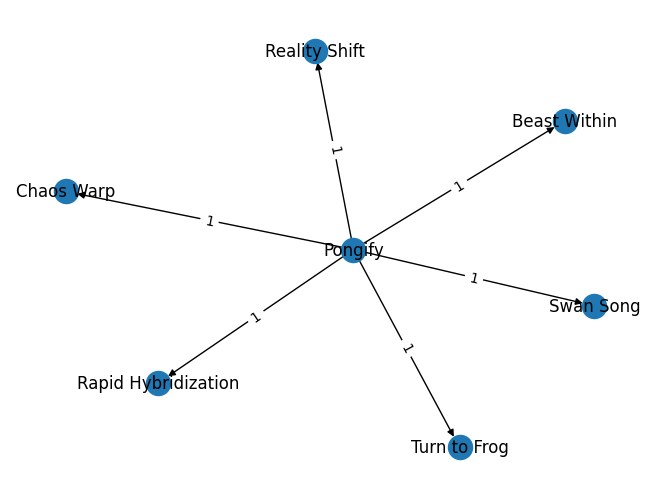

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
similarity_graph = nx.DiGraph()
for card in similar_cards:
    similarity_graph.add_edge("Pongify", card["name"], weight=1)
#plot the graph

pos = nx.spring_layout(similarity_graph)
nx.draw(similarity_graph, pos, with_labels=True)
labels = nx.get_edge_attributes(similarity_graph, 'weight')
nx.draw_networkx_edge_labels(similarity_graph, pos, edge_labels=labels)
plt.show()

In [46]:
import plotly.graph_objects as go
G = nx.random_geometric_graph(20, 0.5)

In [56]:
class Plotly_Graph_Ploter():
    def __init__(self):
        pass
    def get_edge_trace(self,G:nx.Graph, pos:dict):
        edge_x = []
        edge_y = []
        for edge in G.edges():
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            edge_x.extend((x0,x1,None))
            edge_y.extend((y0,y1,None))

        return go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=0.5, color='#888'),
            hoverinfo='none',
            mode='lines')

    def get_node_trace(self,G:nx.Graph, pos:dict):

        node_x = []
        node_y = []
        for node in G.nodes():
            x, y = pos[node]
            node_x.append(x)
            node_y.append(y)

        return go.Scatter(
            x=node_x, y=node_y,
            mode='markers',
            hoverinfo='text',
            marker=dict(
                showscale=True,
                # colorscale options
                #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
                #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
                #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
                colorscale='YlGnBu',
                reversescale=True,
                color=[],
                size=10,
                colorbar=dict(
                    thickness=15,
                    title='Node Connections',
                    xanchor='left',
                    titleside='right'
                ),
                line_width=2))
    def add_nodes(self, graph):
        pass
    def plot_graph(self, G: nx.Graph):
        pos = nx.spring_layout(similarity_graph)
        edge_trace = self.get_edge_trace(G, pos)
        node_trace = self.get_node_trace(G, pos)
        node_adjacencies = []
        for adjacencies in G.adjacency():
            node_adjacencies.append(len(adjacencies[1]))

        node_trace.marker.color = node_adjacencies
        node_trace.text =list(pos.keys())
        fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                        )
        fig.show()

In [57]:
ploter = Plotly_Graph_Ploter()
ploter.plot_graph(similarity_graph)

In [20]:
pos

{'Pongify': array([-0.00225789, -0.00604619]),
 'Rapid Hybridization': array([0.71114247, 0.53936802]),
 'Beast Within': array([ 0.90870467, -0.34132264]),
 'Reality Shift': array([-0.13288571,  0.9311116 ]),
 'Turn to Frog': array([-0.74214194, -0.48059612]),
 'Chaos Warp': array([ 0.21300538, -1.        ]),
 'Swan Song': array([-0.95556699,  0.35748533])}

In [30]:
for i in similarity_graph.edges:
    print(i)
    break

('Pongify', 'Rapid Hybridization')


In [34]:
x,y = pos["Pongify"]
x,y

(-0.0022578934916489602, -0.006046191607343493)

In [47]:
node_trace.text

('# of connections: 15',
 '# of connections: 11',
 '# of connections: 4',
 '# of connections: 13',
 '# of connections: 16',
 '# of connections: 11',
 '# of connections: 11',
 '# of connections: 7',
 '# of connections: 7',
 '# of connections: 7',
 '# of connections: 10',
 '# of connections: 8',
 '# of connections: 10',
 '# of connections: 15',
 '# of connections: 9',
 '# of connections: 6',
 '# of connections: 14',
 '# of connections: 11',
 '# of connections: 6',
 '# of connections: 13')